In [125]:
import sqlite3
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [29]:
db = sqlite3.connect('health_air.db')
cursor = db.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('air',), ('asthma',)]


In [72]:
# thank you @rogerallen
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))


In [73]:
states = list(us_state_abbrev.keys())
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [74]:
asthma = pd.read_sql_query("SELECT * from %s" % 'asthma', db)
asthma = asthma[asthma['datavaluetype'] == 'Crude Prevalence']
asthma

,index,year,state_id,question,datavaluetype,datavalue,datavalueunit
0,22649,2019,AL,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.5,%
1,22673,2012,FL,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.2,%
2,22676,2019,OH,Current asthma prevalence among adults aged >=...,Crude Prevalence,11.1,%
3,22681,2011,VT,Current asthma prevalence among adults aged >=...,Crude Prevalence,11.1,%
4,22697,2014,OK,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.7,%
...,...,...,...,...,...,...,...
907,37369,2011,NJ,Current asthma prevalence among adults aged >=...,Crude Prevalence,9,%
908,37410,2014,HI,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.2,%
910,37440,2011,WV,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.2,%
913,37550,2014,MO,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.7,%


In [75]:
asthma = asthma.sort_values(['state_id', 'year'])
asthma

,index,year,state_id,question,datavaluetype,datavalue,datavalueunit
84,23408,2011,AK,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.2,%
45,23161,2012,AK,Current asthma prevalence among adults aged >=...,Crude Prevalence,9,%
12,22860,2013,AK,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.3,%
38,23113,2014,AK,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.1,%
13,22879,2015,AK,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.2,%
...,...,...,...,...,...,...,...
120,23675,2015,WY,Current asthma prevalence among adults aged >=...,Crude Prevalence,8,%
528,31077,2016,WY,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.5,%
263,26367,2017,WY,Current asthma prevalence among adults aged >=...,Crude Prevalence,9.1,%
861,36797,2018,WY,Current asthma prevalence among adults aged >=...,Crude Prevalence,8.7,%


In [107]:
air = pd.read_sql_query("SELECT * from %s" % 'air', db)
air = air.sort_values(['State', 'Year'])
air

,index,State,Year,Max AQI,Median AQI,Days Ozone,Days PM2.5,Days PM10
0,0,Alabama,2010,112,46,131,142,8
1,1,Alabama,2011,111,42,158,84,4
2,2,Alabama,2012,110,40,174,85,3
3,3,Alabama,2013,86,37,173,84,3
4,4,Alabama,2014,93,38,173,83,3
...,...,...,...,...,...,...,...,...
535,535,Wyoming,2015,110,34,235,29,42
536,536,Wyoming,2016,95,37,266,16,44
537,537,Wyoming,2017,169,38,259,18,42
538,538,Wyoming,2018,107,39,269,14,41


In [108]:
print(air.Year.unique())
print(asthma.year.unique())
air = air[~air['Year'].isin([2010])]
air

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
['2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019']


,index,State,Year,Max AQI,Median AQI,Days Ozone,Days PM2.5,Days PM10
1,1,Alabama,2011,111,42,158,84,4
2,2,Alabama,2012,110,40,174,85,3
3,3,Alabama,2013,86,37,173,84,3
4,4,Alabama,2014,93,38,173,83,3
5,5,Alabama,2015,105,39,137,145,3
...,...,...,...,...,...,...,...,...
535,535,Wyoming,2015,110,34,235,29,42
536,536,Wyoming,2016,95,37,266,16,44
537,537,Wyoming,2017,169,38,259,18,42
538,538,Wyoming,2018,107,39,269,14,41


We are missing information for -9 year(s) for District of Columbia
We are missing information for -9 year(s) for District of Columbia
We are missing information for -9 year(s) for District of Columbia
We are missing information for 1 year(s) for New Jersey
We are missing information for 1 year(s) for New Jersey
We are missing information for 1 year(s) for New Jersey
We are missing information for 1 year(s) for Oklahoma
We are missing information for 1 year(s) for Oklahoma
We are missing information for 1 year(s) for Oklahoma


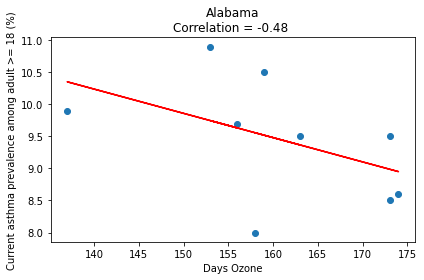

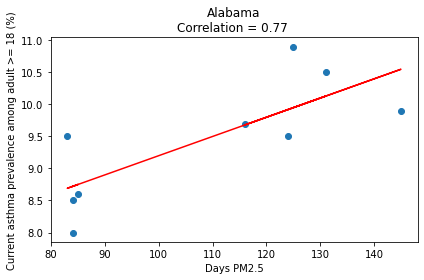

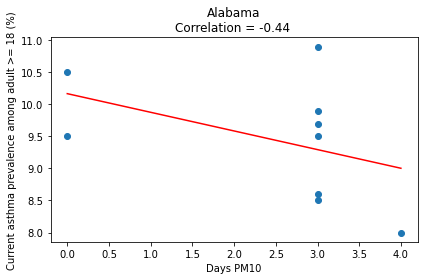

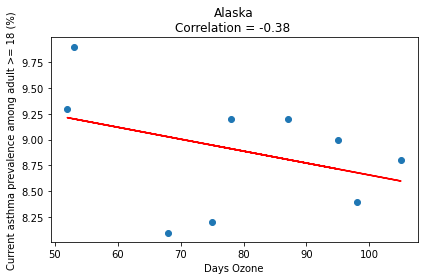

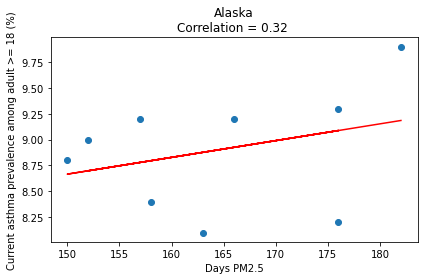

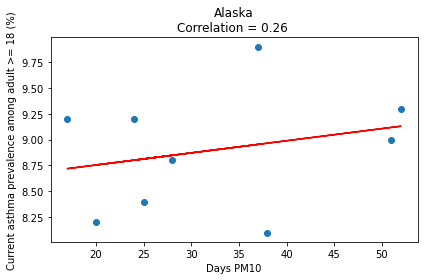

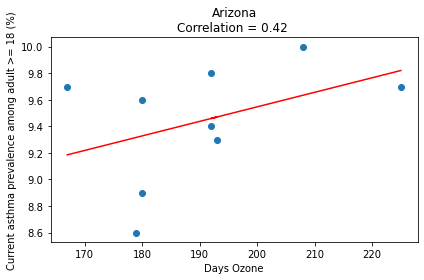

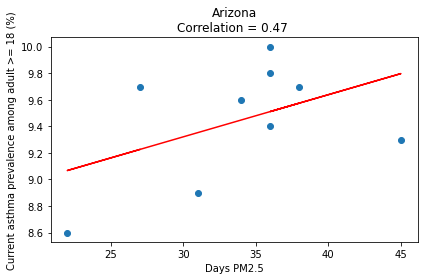

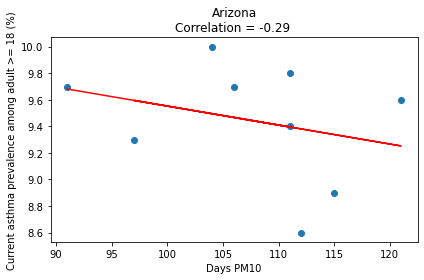

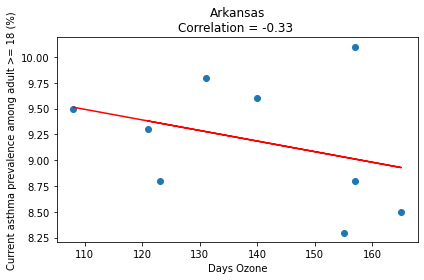

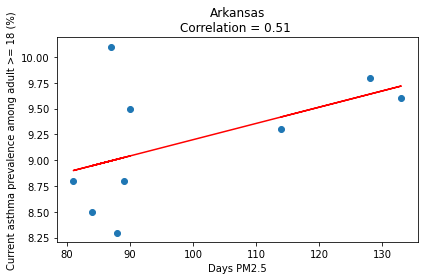

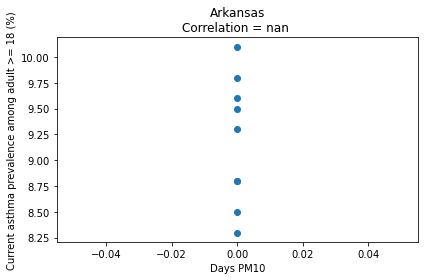

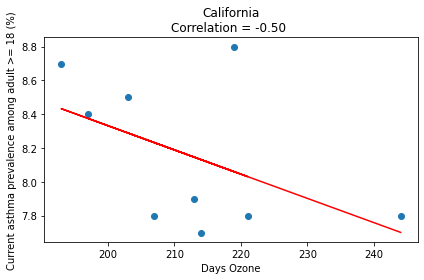

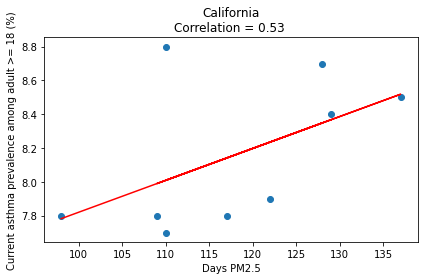

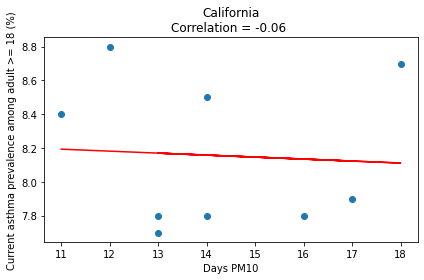

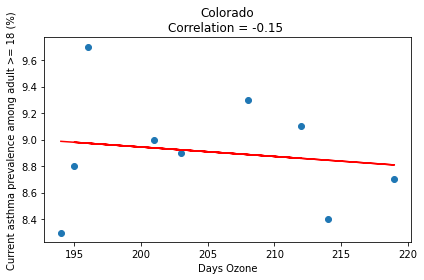

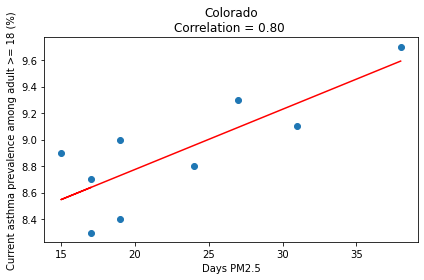

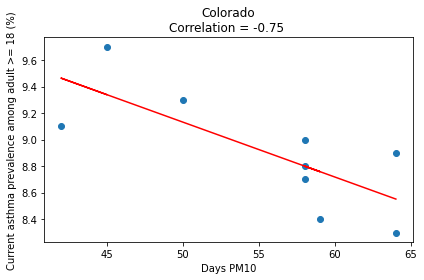

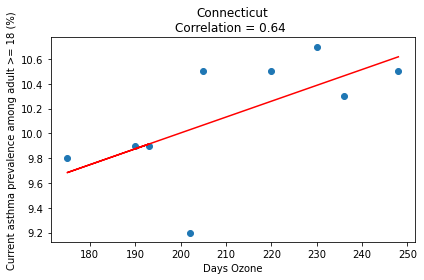

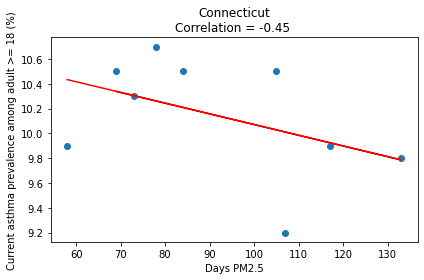

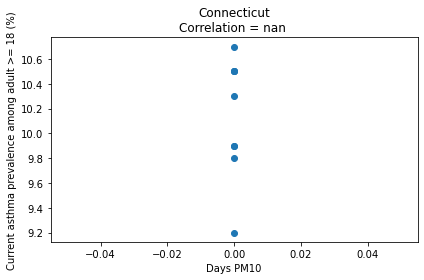

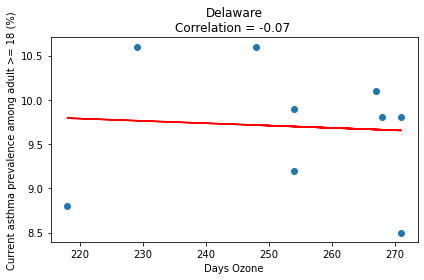

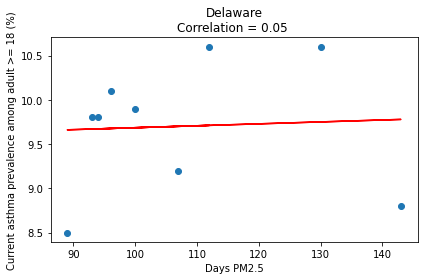

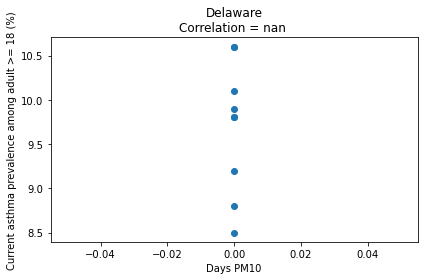

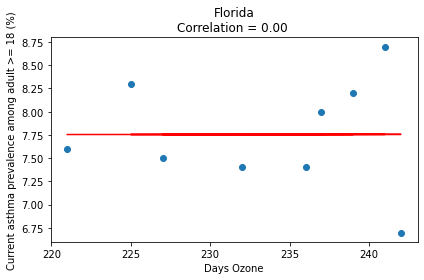

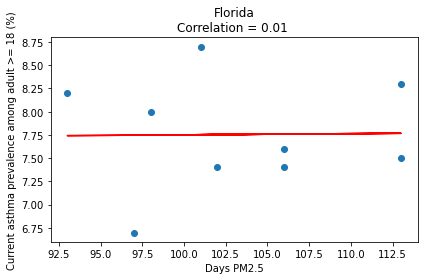

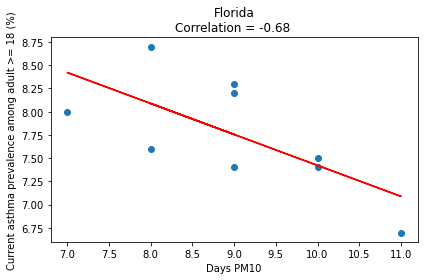

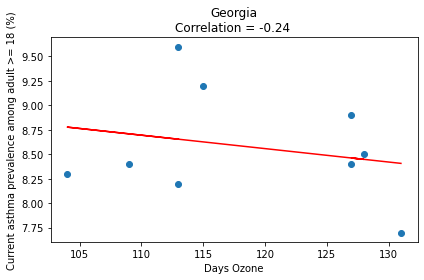

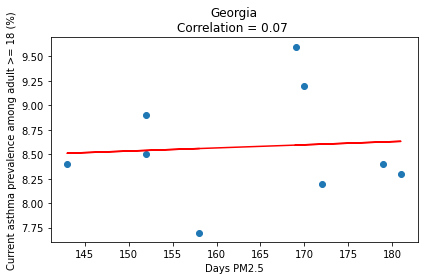

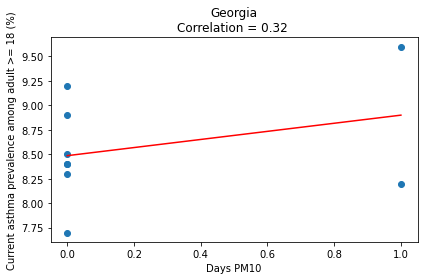

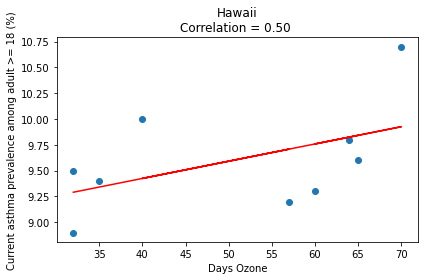

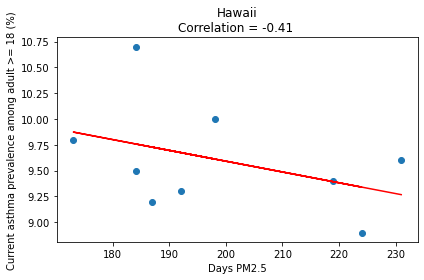

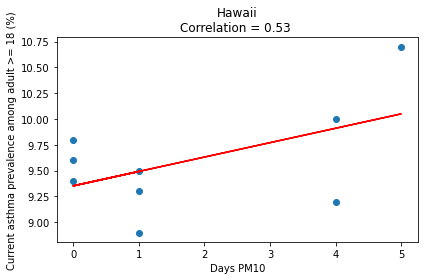

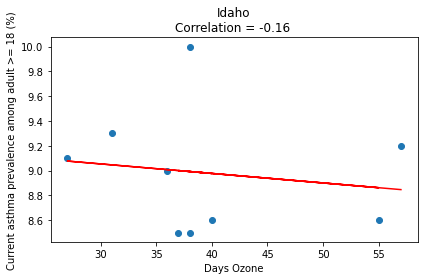

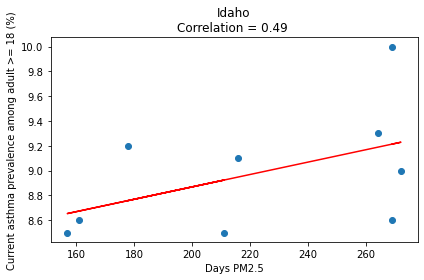

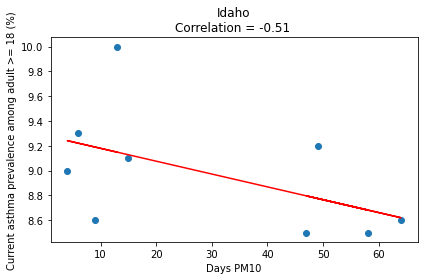

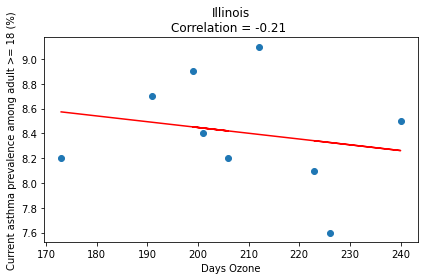

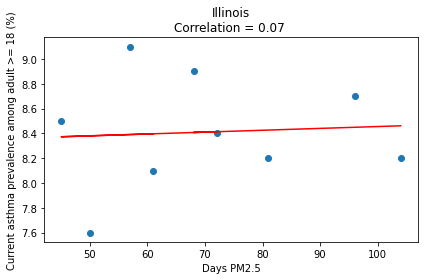

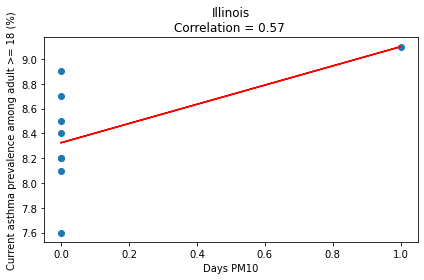

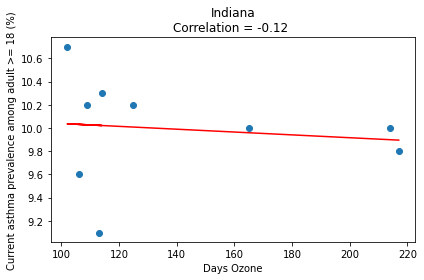

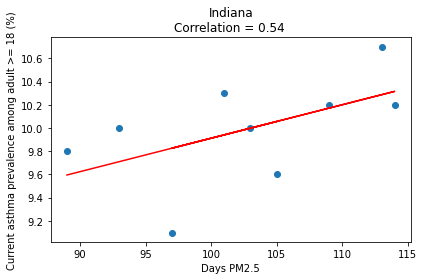

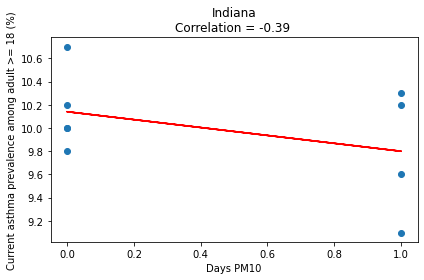

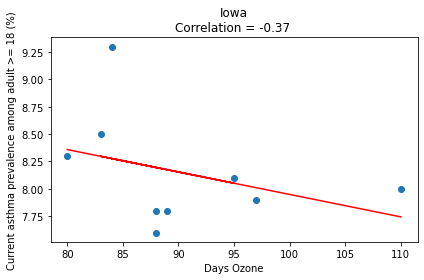

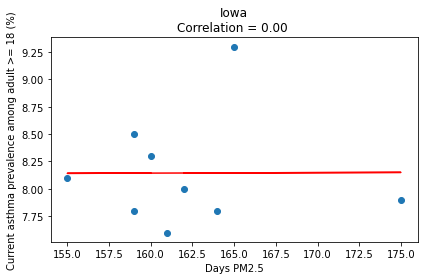

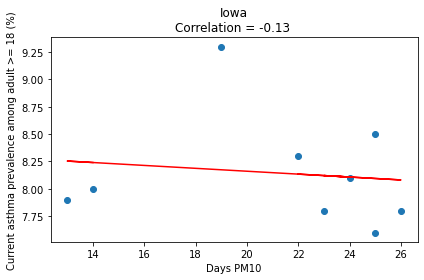

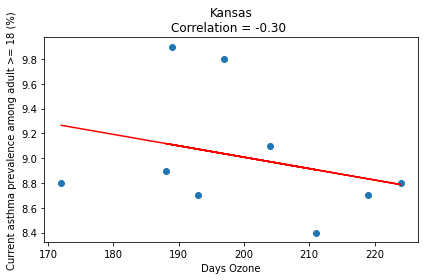

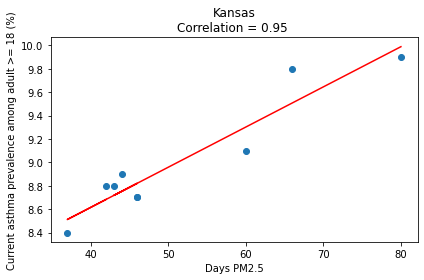

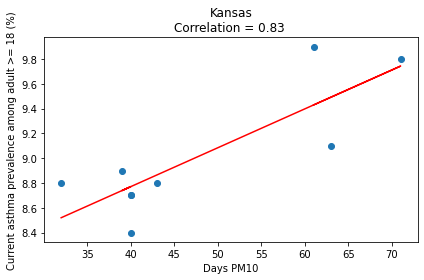

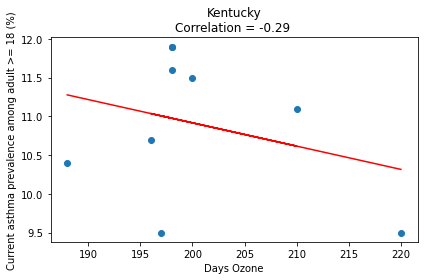

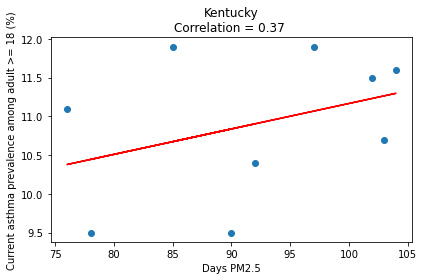

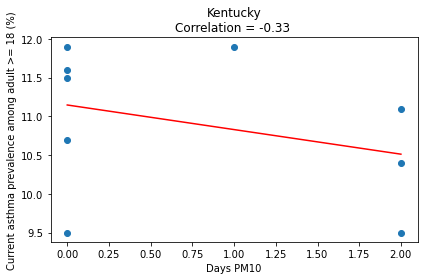

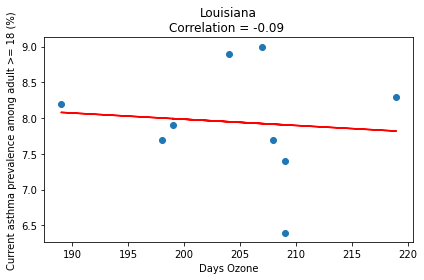

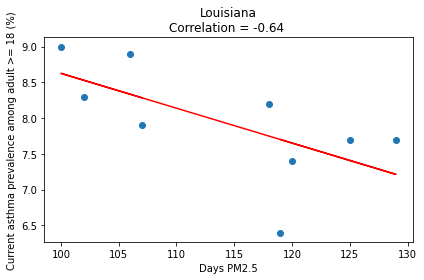

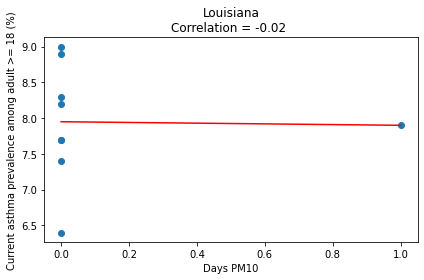

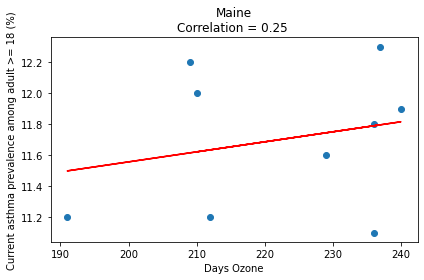

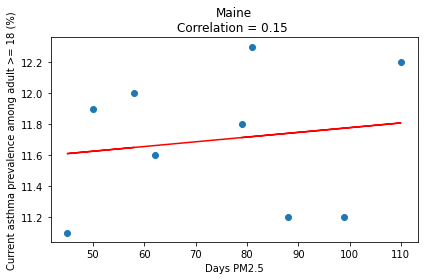

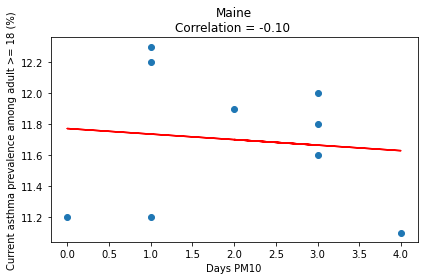

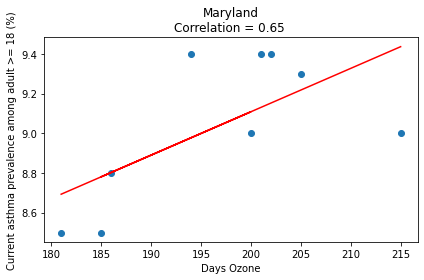

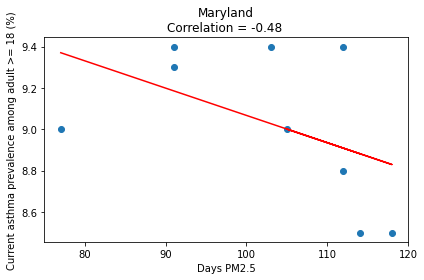

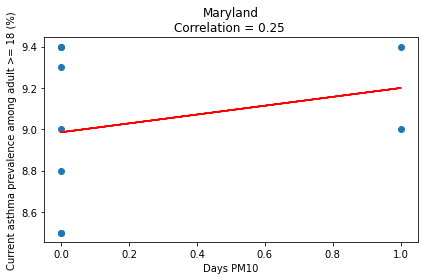

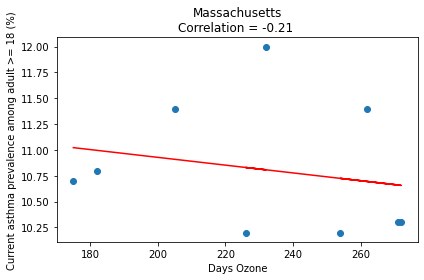

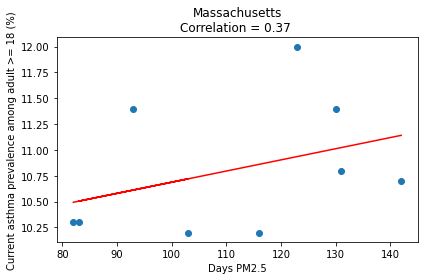

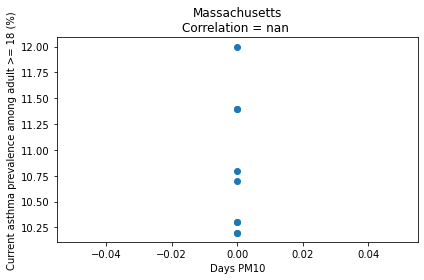

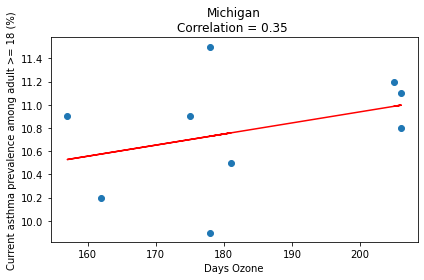

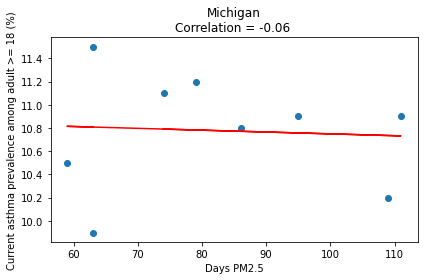

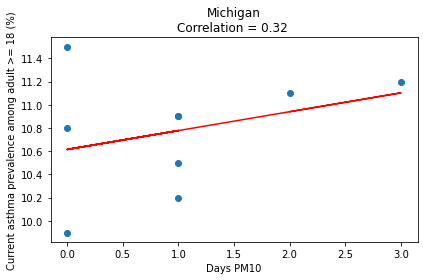

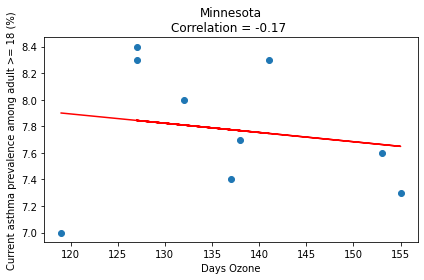

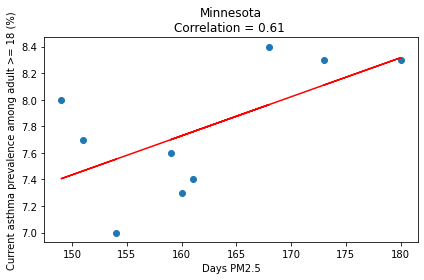

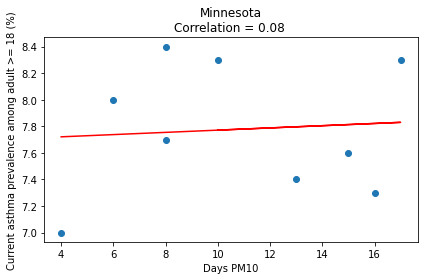

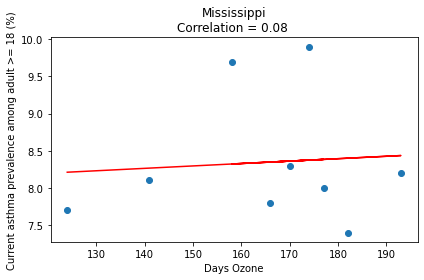

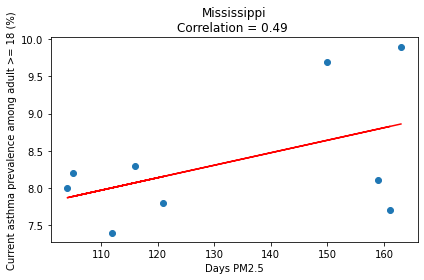

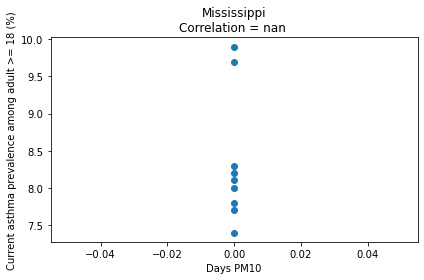

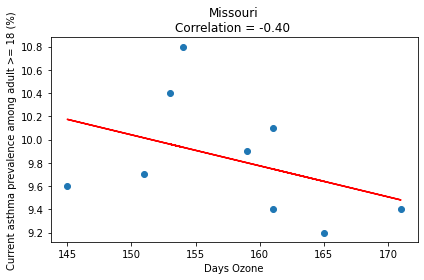

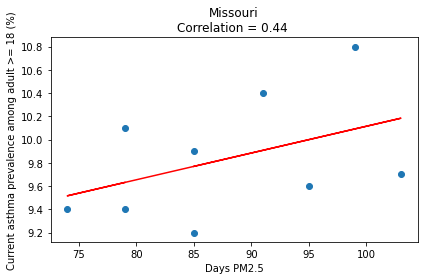

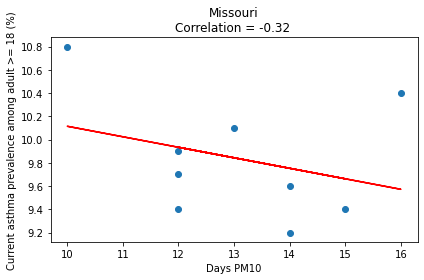

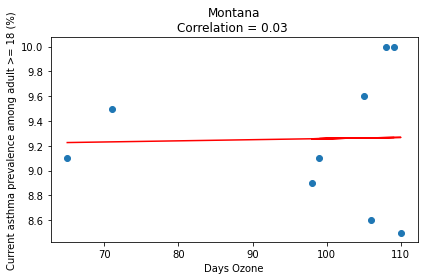

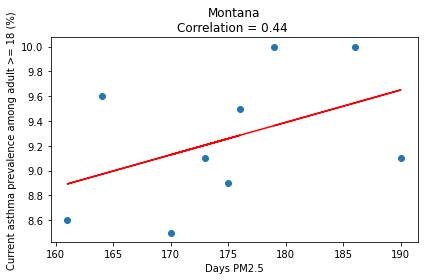

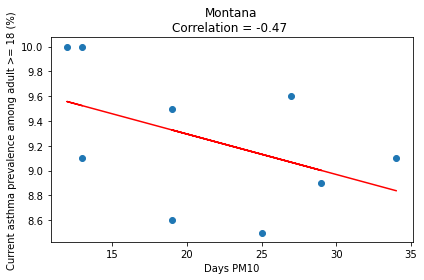

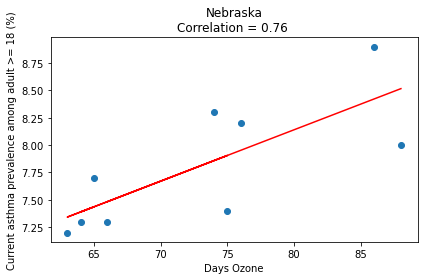

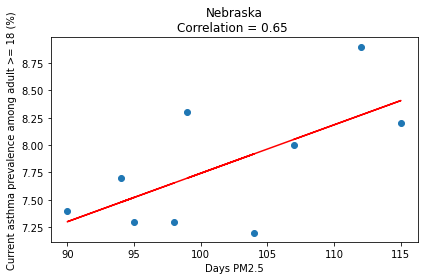

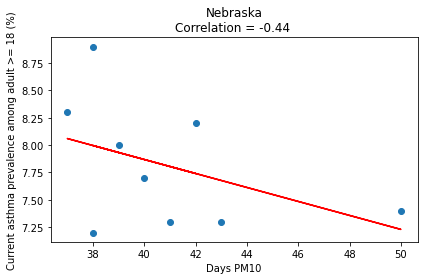

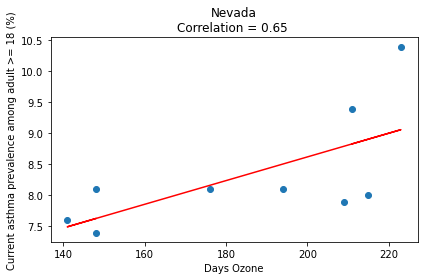

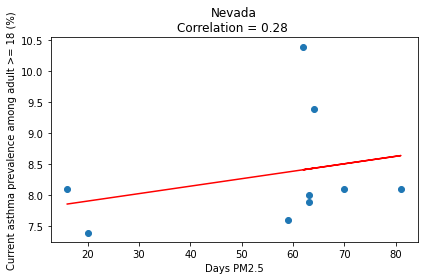

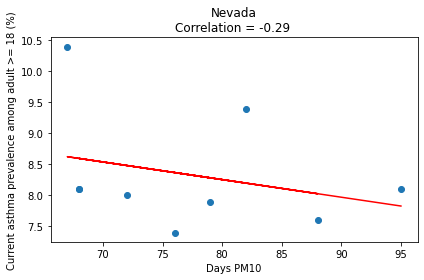

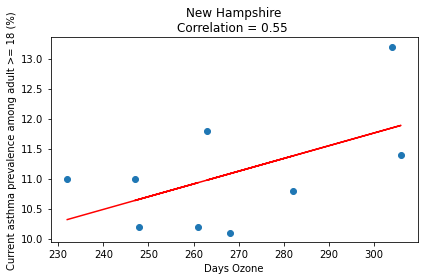

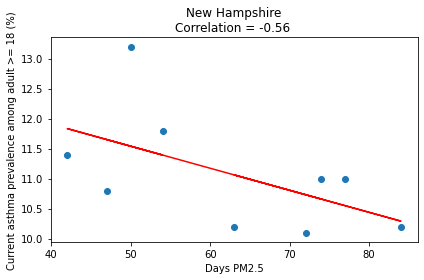

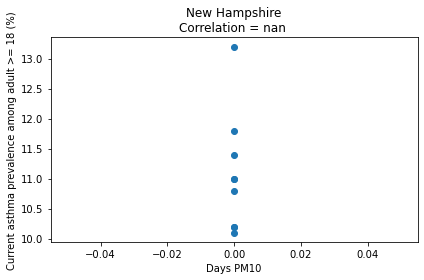

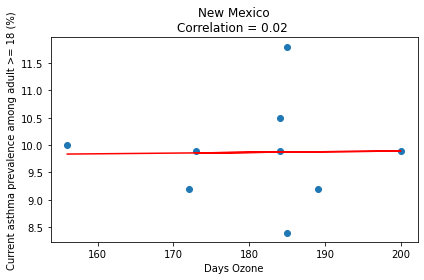

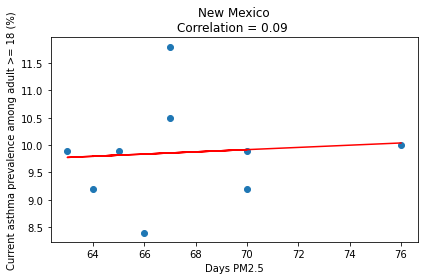

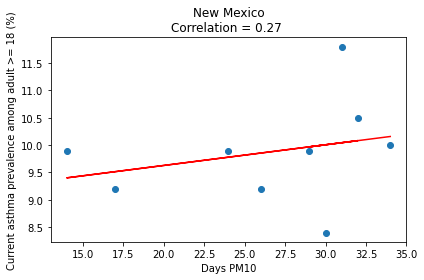

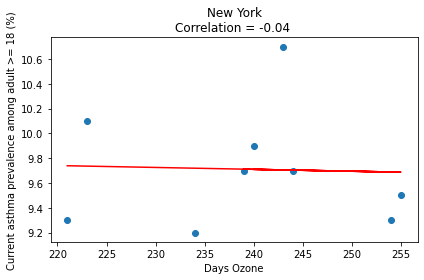

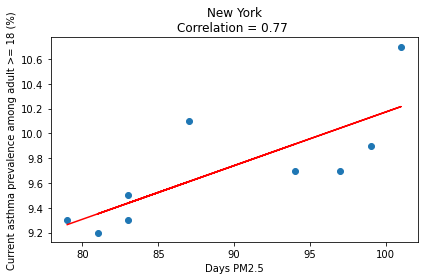

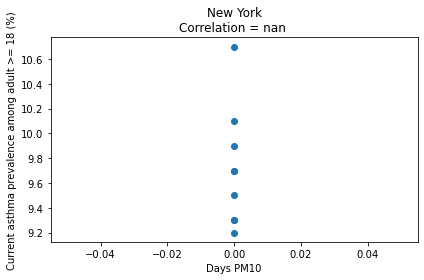

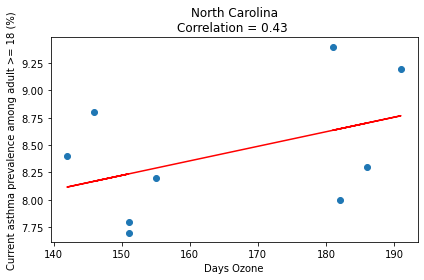

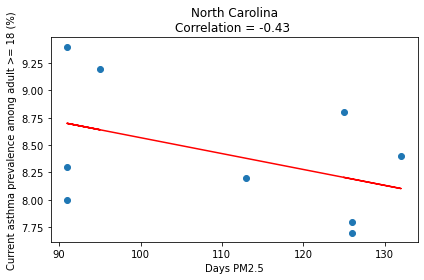

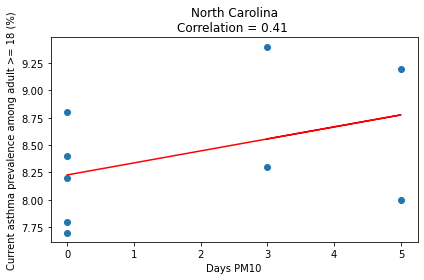

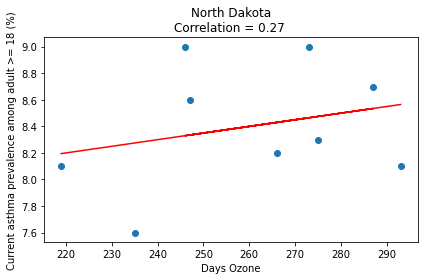

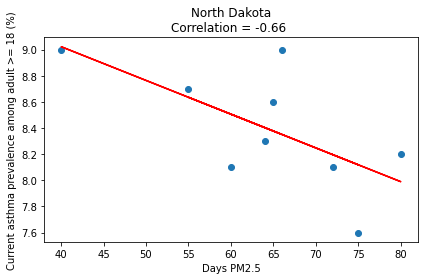

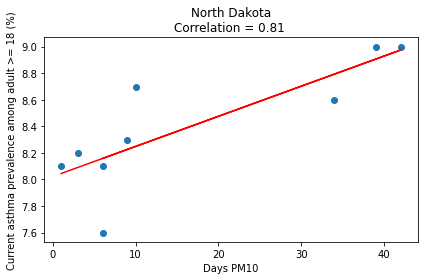

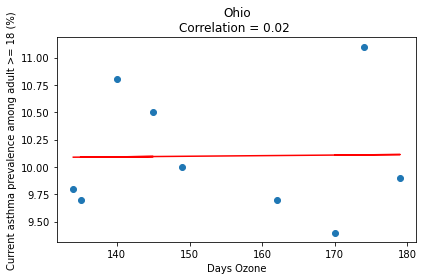

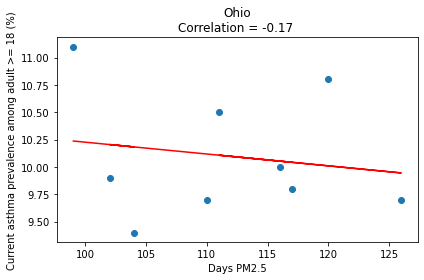

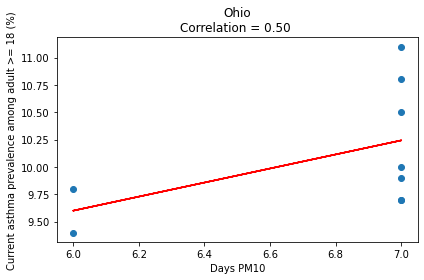

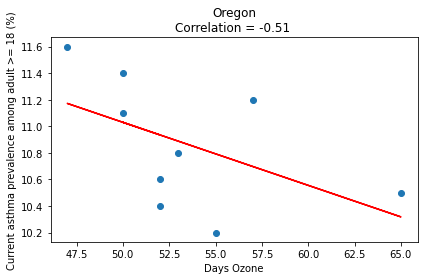

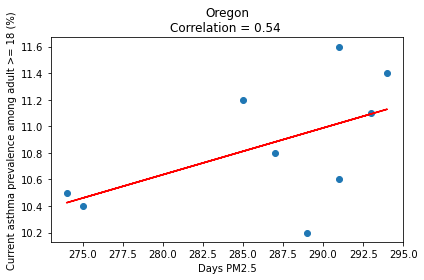

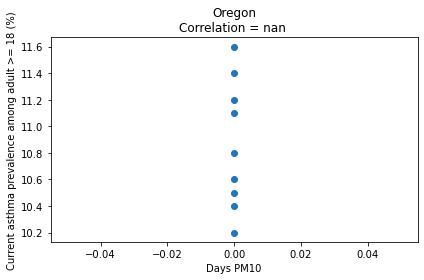

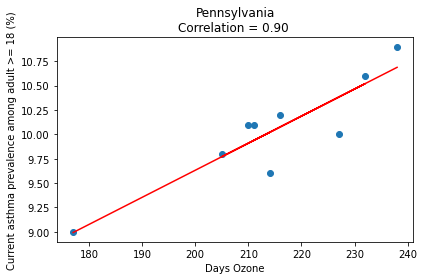

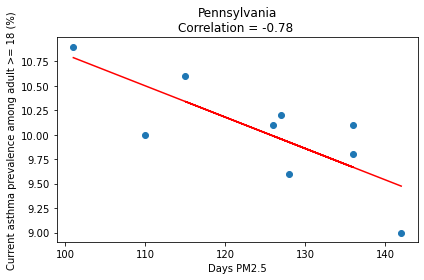

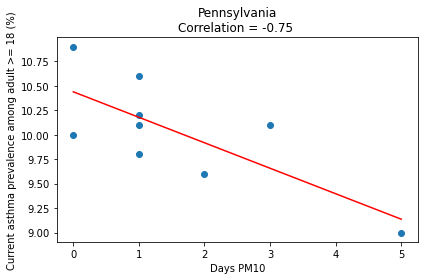

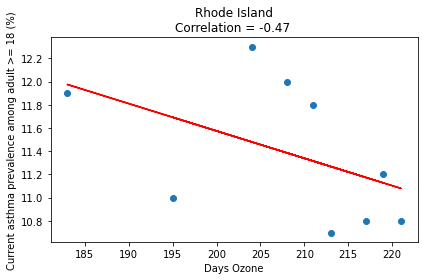

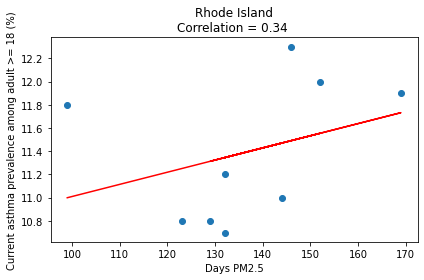

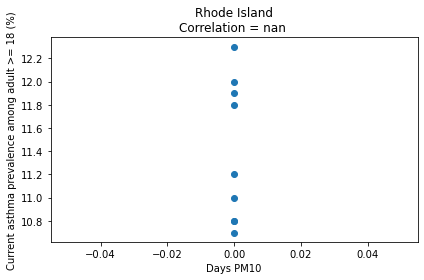

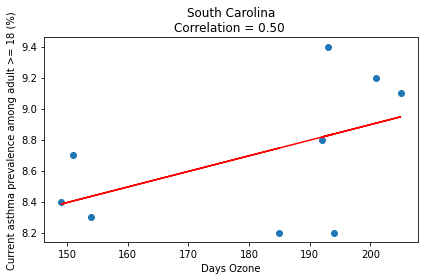

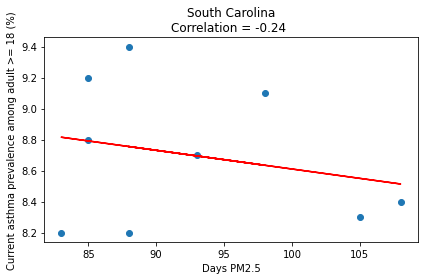

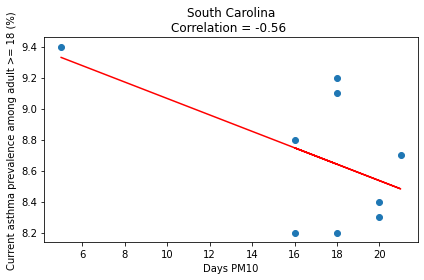

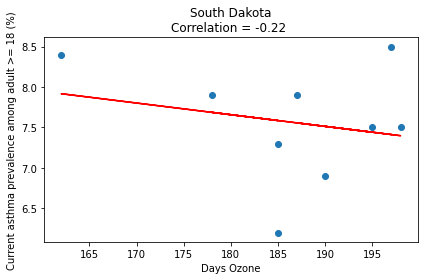

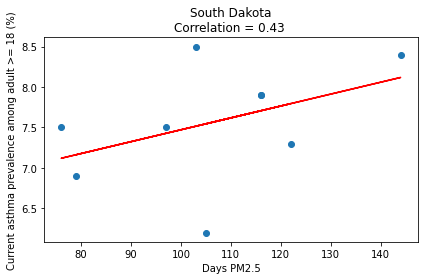

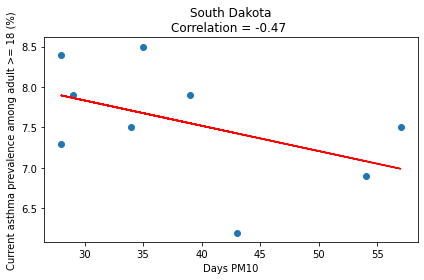

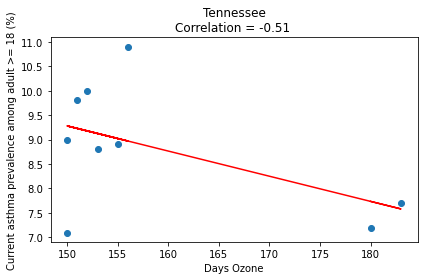

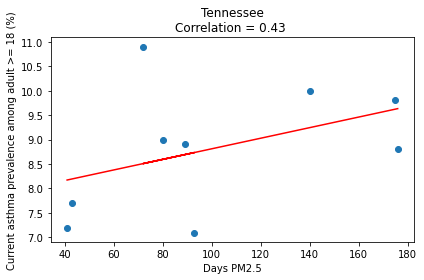

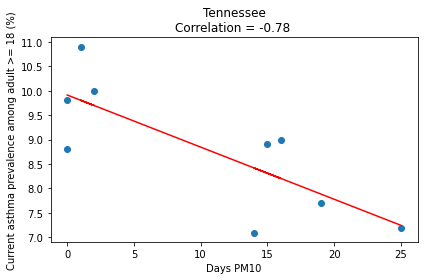

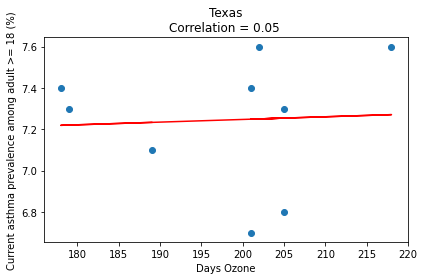

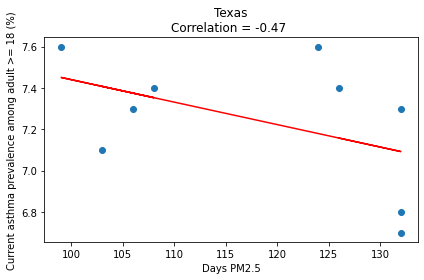

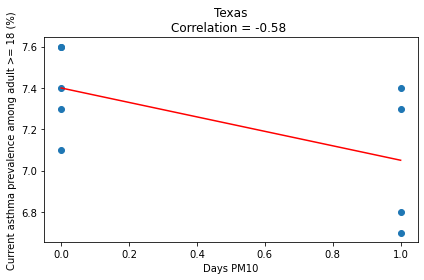

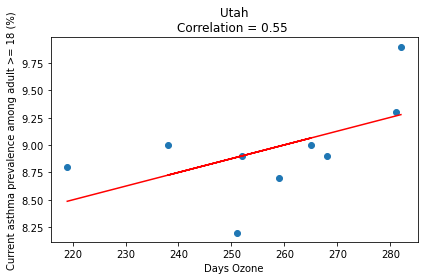

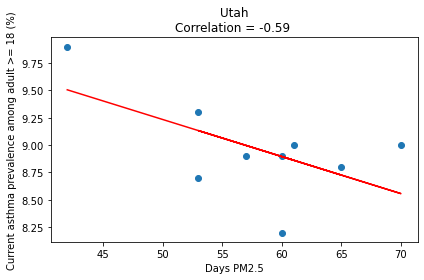

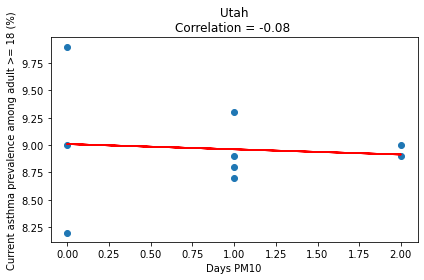

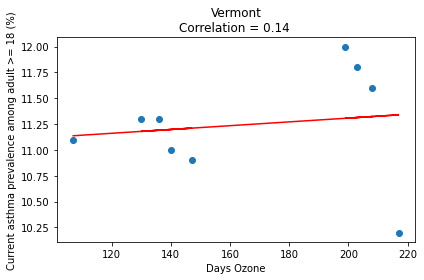

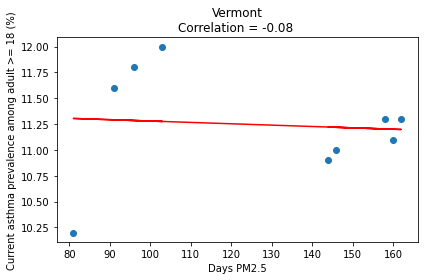

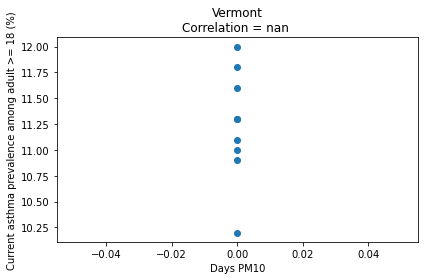

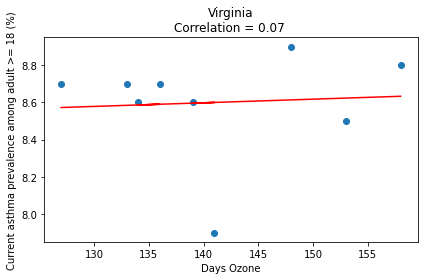

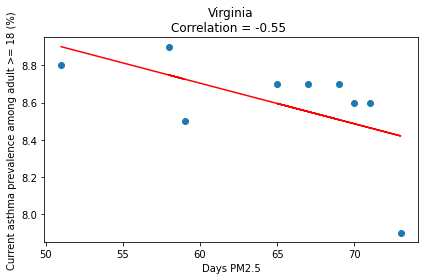

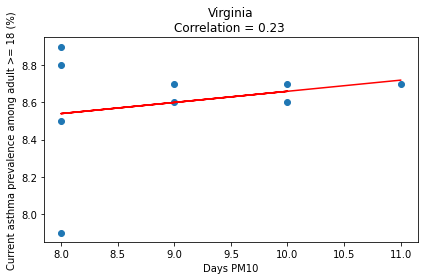

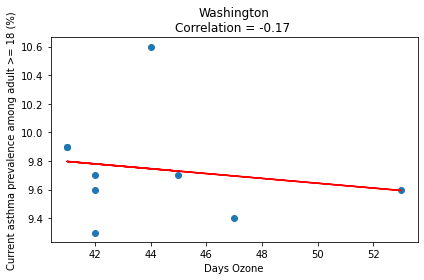

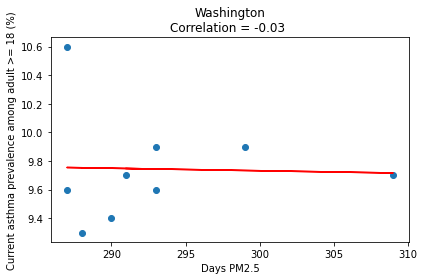

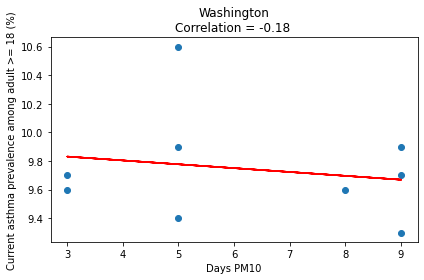

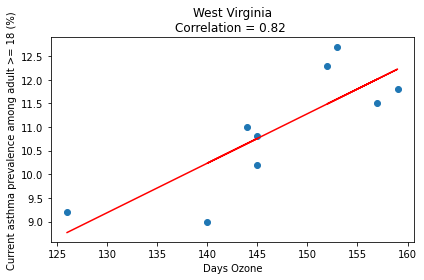

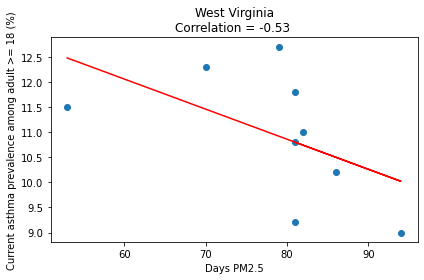

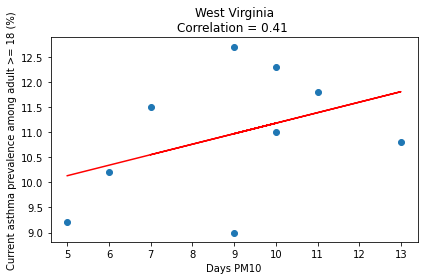

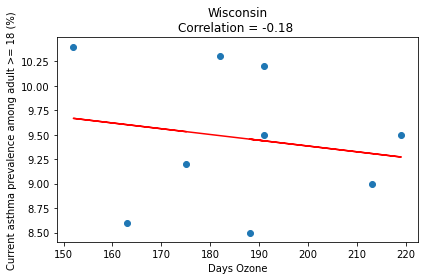

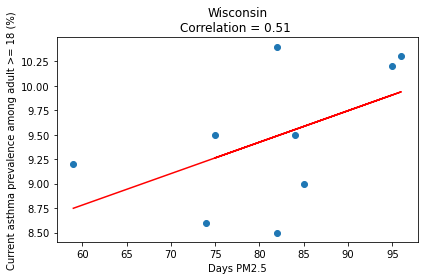

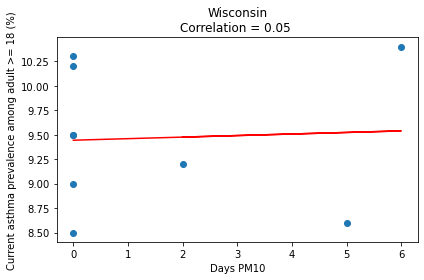

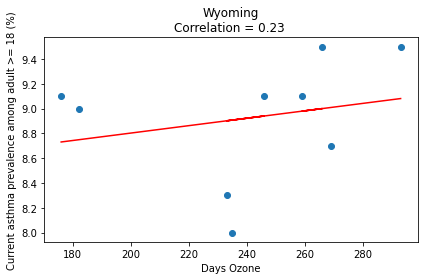

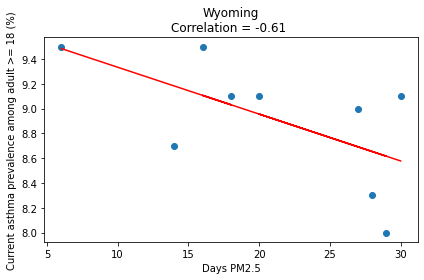

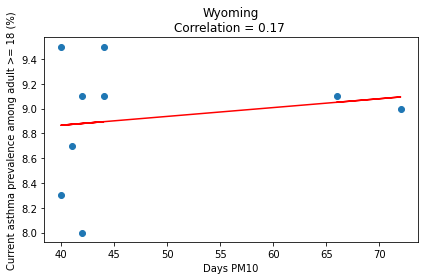

In [126]:
air_params = ['Days Ozone','Days PM2.5','Days PM10']
for index,state in enumerate(states):
    asthma_state = asthma[asthma['state_id'] == us_state_abbrev[state]]['datavalue'].astype(float)
    for param in air_params:
        air_state = air[air['State']==state][param]
        if len(air_state) == len(asthma_state):
            res = linregress(air_state, asthma_state)
            fig, ax = plt.subplots()
            plt.plot(air_state, asthma_state, 'o', label='original data')
            plt.plot(air_state, res.intercept + res.slope*air_state, 'r', label='regression')
            plt.xlabel(f'{param}')
            plt.ylabel(f'Current asthma prevalence among adult >= 18 (%)')
            plt.title(f'{state}\nCorrelation = {np.corrcoef(air_state, asthma_state)[0,1]:.2f} ')
            plt.tight_layout()
            figure_name = os.path.join('static','images',f'{state}_{param}_regression.png')
            plt.savefig('')
        else:
            print(f'We are missing information for {len(air_state) - len(asthma_state)} year(s) for {state}')
    